## Agent-Based Model for Wealth
Agent-Based model of sacrifices/taxes based on the affine wealth model from Bruce M. Boghosian

In [1]:
import pandas as pd
import numpy as np
import random

### The agents

In [2]:
class Agent: 
  def __init__(self, money = 10.0, stake = 0.10):
    self.wealth = money
    self.stake = stake

  def tax_wealth(self, rate):
    taxes = self.wealth * rate
    self.subtract_wealth(taxes)
    return taxes

  def subtract_wealth(self, amount):
    self.wealth = self.wealth - amount

  def add_wealth(self, amount):
    self.wealth = self.wealth + amount
              
  def interact(self, opponent):
    min_wealth = min(self.wealth, opponent.wealth)
    stake = min_wealth * self.stake
    flip = random.randint(0, 1)
    if (flip == 0):
      self.add_wealth(stake)
      opponent.subtract_wealth(stake)
    else:
      self.subtract_wealth(stake)
      opponent.add_wealth(stake)
        

In [3]:
a = Agent()
b = Agent()
a.interact(b)
a.interact(b)
a.interact(b)
a.interact(b)
a.interact(b)
print("Agent A wealth", a.wealth)
print("Agent B wealth", b.wealth)

Agent A wealth 12.6209
Agent B wealth 7.379099999999999


### The agent based model

In [4]:
class AgentBasedModel:
  def __init__(self, n, rate = 0):
    self.apply_taxes = rate > 0
    self.tax_rate = rate
    self.agents = n
    self.model = []
    self.data = []
    for x in range(self.agents): self.model.append(Agent())
        
  def random_agent(self):
    i = random.randrange(0, self.agents)
    return self.model[i]

  def play(self, timestep):
      agent1 = self.random_agent()
      agent2 = agent1
      while (agent1 == agent2): 
        agent2 = self.random_agent()
      agent1.interact(agent2)
      
      if self.apply_taxes:
        taxed_agent = self.random_agent()
        taxes = taxed_agent.tax_wealth(self.tax_rate) / self.agents
        for x in range(self.agents):
          agent = self.random_agent()
          if agent != taxed_agent: agent.add_wealth(taxes) 

  def wealth_distribution(self):
      distribution = [agent.wealth for agent in self.model]
      return distribution

  def run(self, timesteps):
    for t in range(timesteps):
      self.play(t)

In [5]:
x_0 = AgentBasedModel(250, 0)
x_0.run(50000)
df_0 = pd.DataFrame(x_0.wealth_distribution(), columns=['Wealth'])

x_1 = AgentBasedModel(250, 0.01)
x_1.run(50000)
df_1 = pd.DataFrame(x_1.wealth_distribution(), columns=['Wealth'])

x_2 = AgentBasedModel(250, 0.02)
x_2.run(50000)
df_2 = pd.DataFrame(x_2.wealth_distribution(), columns=['Wealth'])

x_3 = AgentBasedModel(250, 0.03)
x_3.run(50000)
df_3 = pd.DataFrame(x_3.wealth_distribution(), columns=['Wealth'])

x_4 = AgentBasedModel(250, 0.04)
x_4.run(50000)
df_4 = pd.DataFrame(x_4.wealth_distribution(), columns=['Wealth'])


df_4.head(10)

,Wealth
0,6.742367
1,13.287926
2,12.314418
3,8.712763
4,19.171660
5,9.513661
6,13.426095
7,6.544423
8,15.289689
9,10.722253


In [6]:
bins = np.arange(0,100.0,5)
df_0.groupby(pd.cut(df_0.Wealth, bins)).count()

,Wealth
Wealth,
"(0.0, 5.0]",131
"(5.0, 10.0]",43
"(10.0, 15.0]",23
"(15.0, 20.0]",13
"(20.0, 25.0]",8
"(25.0, 30.0]",6
"(30.0, 35.0]",9
"(35.0, 40.0]",2
"(40.0, 45.0]",5


In [7]:
avg_1 =  df_1[df_1.Wealth < 10].mean()
avg_2 =  df_2[df_2.Wealth < 11].mean()
avg_3 =  df_3[df_3.Wealth < 12].mean()
avg_4 =  df_4[df_4.Wealth < 15].mean()
print("0% rate average", avg_1)
print("1% rate average", avg_2)
print("2% rate average", avg_3)
print("3% rate average", avg_4)

0% rate average Wealth    5.263012
dtype: float64
1% rate average Wealth    6.549778
dtype: float64
2% rate average Wealth    7.45862
dtype: float64
3% rate average Wealth    8.659643
dtype: float64


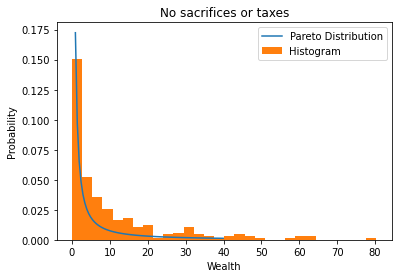

In [8]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.stats import pareto 
t = np.arange(0.9, 40., 0.5)
R = pareto.pdf(x=t, b=0.3, loc=0, scale=0.1)
p1 = plt.plot(t, R, label="Pareto Distribution")
p2 = plt.hist(df_0.Wealth, density=True, bins=30, label="Histogram")
plt.ylabel('Probability')
plt.xlabel('Wealth')
plt.title('No sacrifices or taxes')

plt.legend()
plt.show()

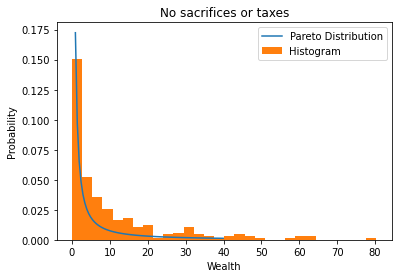

In [9]:
mpl.use('svg')

p1 = plt.plot(t, R, label="Pareto Distribution")
p2 = plt.hist(df_0.Wealth, density=True, bins=30, label="Histogram")
plt.ylabel('Probability')
plt.xlabel('Wealth')
plt.title('No sacrifices or taxes')
plt.legend()

plt.savefig("WealthDistributionNoTaxes.svg", format="svg")

/Users/jochenfromm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using svg, which is a non-GUI backend, so cannot show the figure.


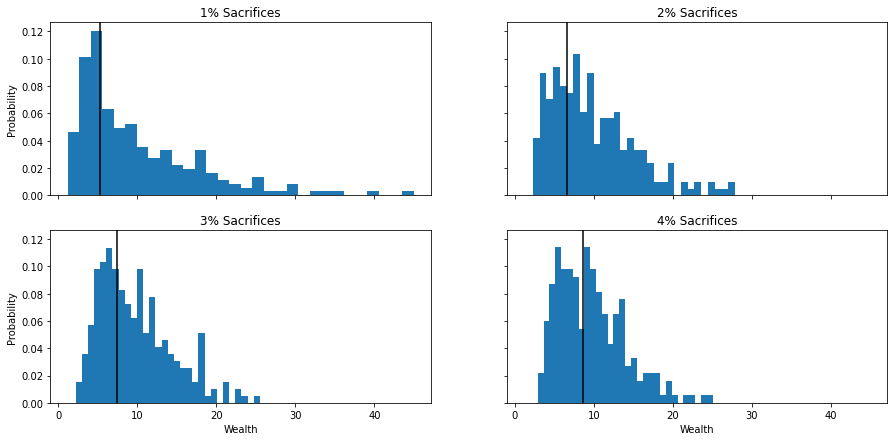

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(15,7), sharex=True, sharey=True)
axs[0, 0].hist(df_1.Wealth, density=True, bins=30)
axs[0, 0].axvline(x=float(avg_1), color="Black")
axs[0, 0].set_title('1% Sacrifices')

axs[0, 1].hist(df_2.Wealth, density=True, bins=30)
axs[0, 1].axvline(x=float(avg_2), color="Black")
axs[0, 1].set_title('2% Sacrifices')

axs[1, 0].hist(df_3.Wealth, density=True, bins=30)
axs[1, 0].axvline(x=float(avg_3), color="Black")
axs[1, 0].set_title('3% Sacrifices')

axs[1, 1].hist(df_4.Wealth, density=True, bins=30)
axs[1, 1].axvline(x=float(avg_4), color="Black")
axs[1, 1].set_title('4% Sacrifices')

for ax in axs.flat:
    ax.set(xlabel='Wealth', ylabel='Probability')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.show()

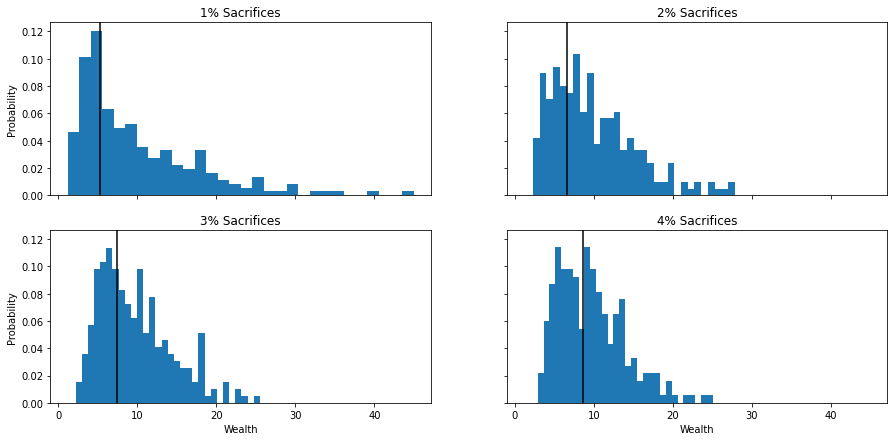

In [11]:
mpl.use('svg')

fig, axs = plt.subplots(2, 2, figsize=(15,7), sharex=True, sharey=True)
axs[0, 0].hist(df_1.Wealth, density=True, bins=30)
axs[0, 0].axvline(x=float(avg_1), color="Black")
axs[0, 0].set_title('1% Sacrifices')

axs[0, 1].hist(df_2.Wealth, density=True, bins=30)
axs[0, 1].axvline(x=float(avg_2), color="Black")
axs[0, 1].set_title('2% Sacrifices')

axs[1, 0].hist(df_3.Wealth, density=True, bins=30)
axs[1, 0].axvline(x=float(avg_3), color="Black")
axs[1, 0].set_title('3% Sacrifices')

axs[1, 1].hist(df_4.Wealth, density=True, bins=30)
axs[1, 1].axvline(x=float(avg_4), color="Black")
axs[1, 1].set_title('4% Sacrifices')

for ax in axs.flat:
    ax.set(xlabel='Wealth', ylabel='Probability')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.savefig("WealthDistributionTaxes.svg", format="svg")